# <p style="text-align: center;">Volcanoes and Their Effects on Global Temperatures</p>
<br/><br/>

<p style="text-align: center;"> $\textbf{Johnathan C. Kuttai}$</p>

<p style="text-align: center;">Department of Earth, Ocean and Atmospheric Sciences</p>

<p style="text-align: center;">University of British Columbia University</p>

<p style="text-align: center;">Vancouver, BC 15213</p>

<p style="text-align: center;">11074580</p>

<p style="text-align: center;">$\texttt{jkutt@eoas.ubc.ca}$ </p>

<br/><br/>

## <p style="text-align: center;">Abstract</p>

<p style="text-align: justify;"> Natural sources capable of affecting global temperature are few far between but their effects are far reaching and potentially
catastrophic. Volcanoes are an example of a source capable of such a feat. They are explosive and destructive and vary in 
impact strength. The impact depends greatly on where the material from the eruption is injected into the atmosphere. Material injected into the top layers, for example the stratosphere, remain longer than in the lower layers. Material in the top layers can remain for years while the lower layers the material can be cycled out in months [12]. To reach the stratosphere are the extreme events that tend to occur on long time scales of hundreds of years at minimum. The two common volcanic events are the single explosive event and the less immediately impactful cluster volcanoes. Between the two, an assessment of the potential of each to affect climate is analyzed.</p>

<br/><br/>


## 1. Introduction

Volcanic events can range from mild to extreme events which can directly impact climate. This is done by injecting mostly sulphur dioxide into the stratosphere which is oxidised into sulphate aerosols [[1]](#ref1) ([figure 1](#fig0)). Not only are the sulphates a problem but volcanoes can emit $CO_2$ and other harmful aerosols. $CO_2$ is formally known to increase global temperatures while aerosols produce periods of cooling [[3]](#ref3). The cooling is due the scattering of incoming radiation at various amounts given the aerosol makeup [[2]](#ref2). Different elements will scatter more efficiently than others.

Given that Aerosols will have a relatively short lifetime (roughly one year) [[1]](#ref1), different types of volcanic events will have varied effects on long term climate. Generally two types of volcanic events can occur; single explosive and cluster events [[8]](#ref8). Since the intensity of volcanic events can vary, the aerosols can be injected at different heights in the atmosphere.

Provided all this variability, the radiative forcings could be greatly different from case to case. For example single events will have great immediate effect where cluster events could frequently replenish the aerosols and $CO_2$ creating a contrast of constant cooling due to aerosols and warming due to $CO_2$.

In recent history very few large magnitude events have occurred. 
- Mount Pinatubo (Philippines, 1991) 
- Mount Hudson (Chile, 1991)
- Mount St. Helens (United States, 1980)
- Mount Tambora (Indonesia, 1815)
- Laki (Iceland, 1783)
- Krakatoa (Indonesia, 1883)

Each caused significant effects on the global climate. Since Volcanoes emit both $CO_2$ and $SO_4$, volcanoes have a unique opportunity to heat and to cool the planet. The heating comes from additional $CO_2$ in the atmosphere creating a greenhouse effect. This is counteracted by cooling caused by the additional $SO_4$ in the atmosphere. This study builds a model using The Climate Laboratory’s **Climlab** [[9]](#ref9) open source codes to explore this process and the effects it can have on a warming climate like we are currently experiencing. The impact of each type of volcanic event; the explosive and cluster events will also be accessed on the climate sensitivity of both. The thought is that given the most common chemical makeup in a volcanic event is $SO_4$ which cools global surface temperatures, that it can be combative to the amount of $CO_2$ introduced yearly anthropogenically.

![01-volcano-event.png](figures/01-volcano-event.png)

<a id='fig0'>**Figure 1:**</a> **Injection scenarios for volcanic events [8].**

<br/>

Many of the above events are dated before technological measurements. The sample pool of these events is therefore limited. Though, Mount Pinatubo models are readily available through VolMIP [[8]](#ref8). This study will focus on the VolMIP Canadian model CMIP6 CanESM5. Using this model we can compare and validate the model's results.


## 2. Aerosols

The main connectivity that volcanoes have to climate is via aerosols. The most common chemical makeup of aerosols are the following:

- Sulphates
- Carbon dioxide
- Chlorides
- Silicates
- Trace elements

Sulphates are typically the most abundant and in the form of SO4 it readily reacts with Ozone ($O_3$) and depletes it. Since $O_3$ is concentrated in the Stratosphere, the effects here are greater. Chlorides can also have significant effects as it can readily react with atmosphere generally creating hydrochloric acid (HCl) [[11]](#ref11). For the entirety of this study the aerosols are parameterized as a makeup of all the common aerosol constituents. Sulphates being the primary.


## 3. Mount Pinatubo CanESM5 data

Mount Pinatubo is located in the equatorial tropics in the northern hemisphere in southern asia [figure 2](#fig1). The impact of this 1991 eruption was far reaching, injecting material into the stratosphere made the effects long lasting. The main data of concern to this project are the aerosols and temperatures. The radiation balance is also analysed as it relates to the source of energy which in turn relates to the heating for the planet. Figure 2a presents the aerosol distribution across the northern and southern hemispheres. A notable feature is the warmer temperature in the northern hemisphere coinciding with highest aerosol optical depth values (AOD). Being that the eruption occurred in the northern hemisphere we see the highest concentration of aerosol optical depth over the mid-northern latitudes due to the atmospheric circulation.

<br/>

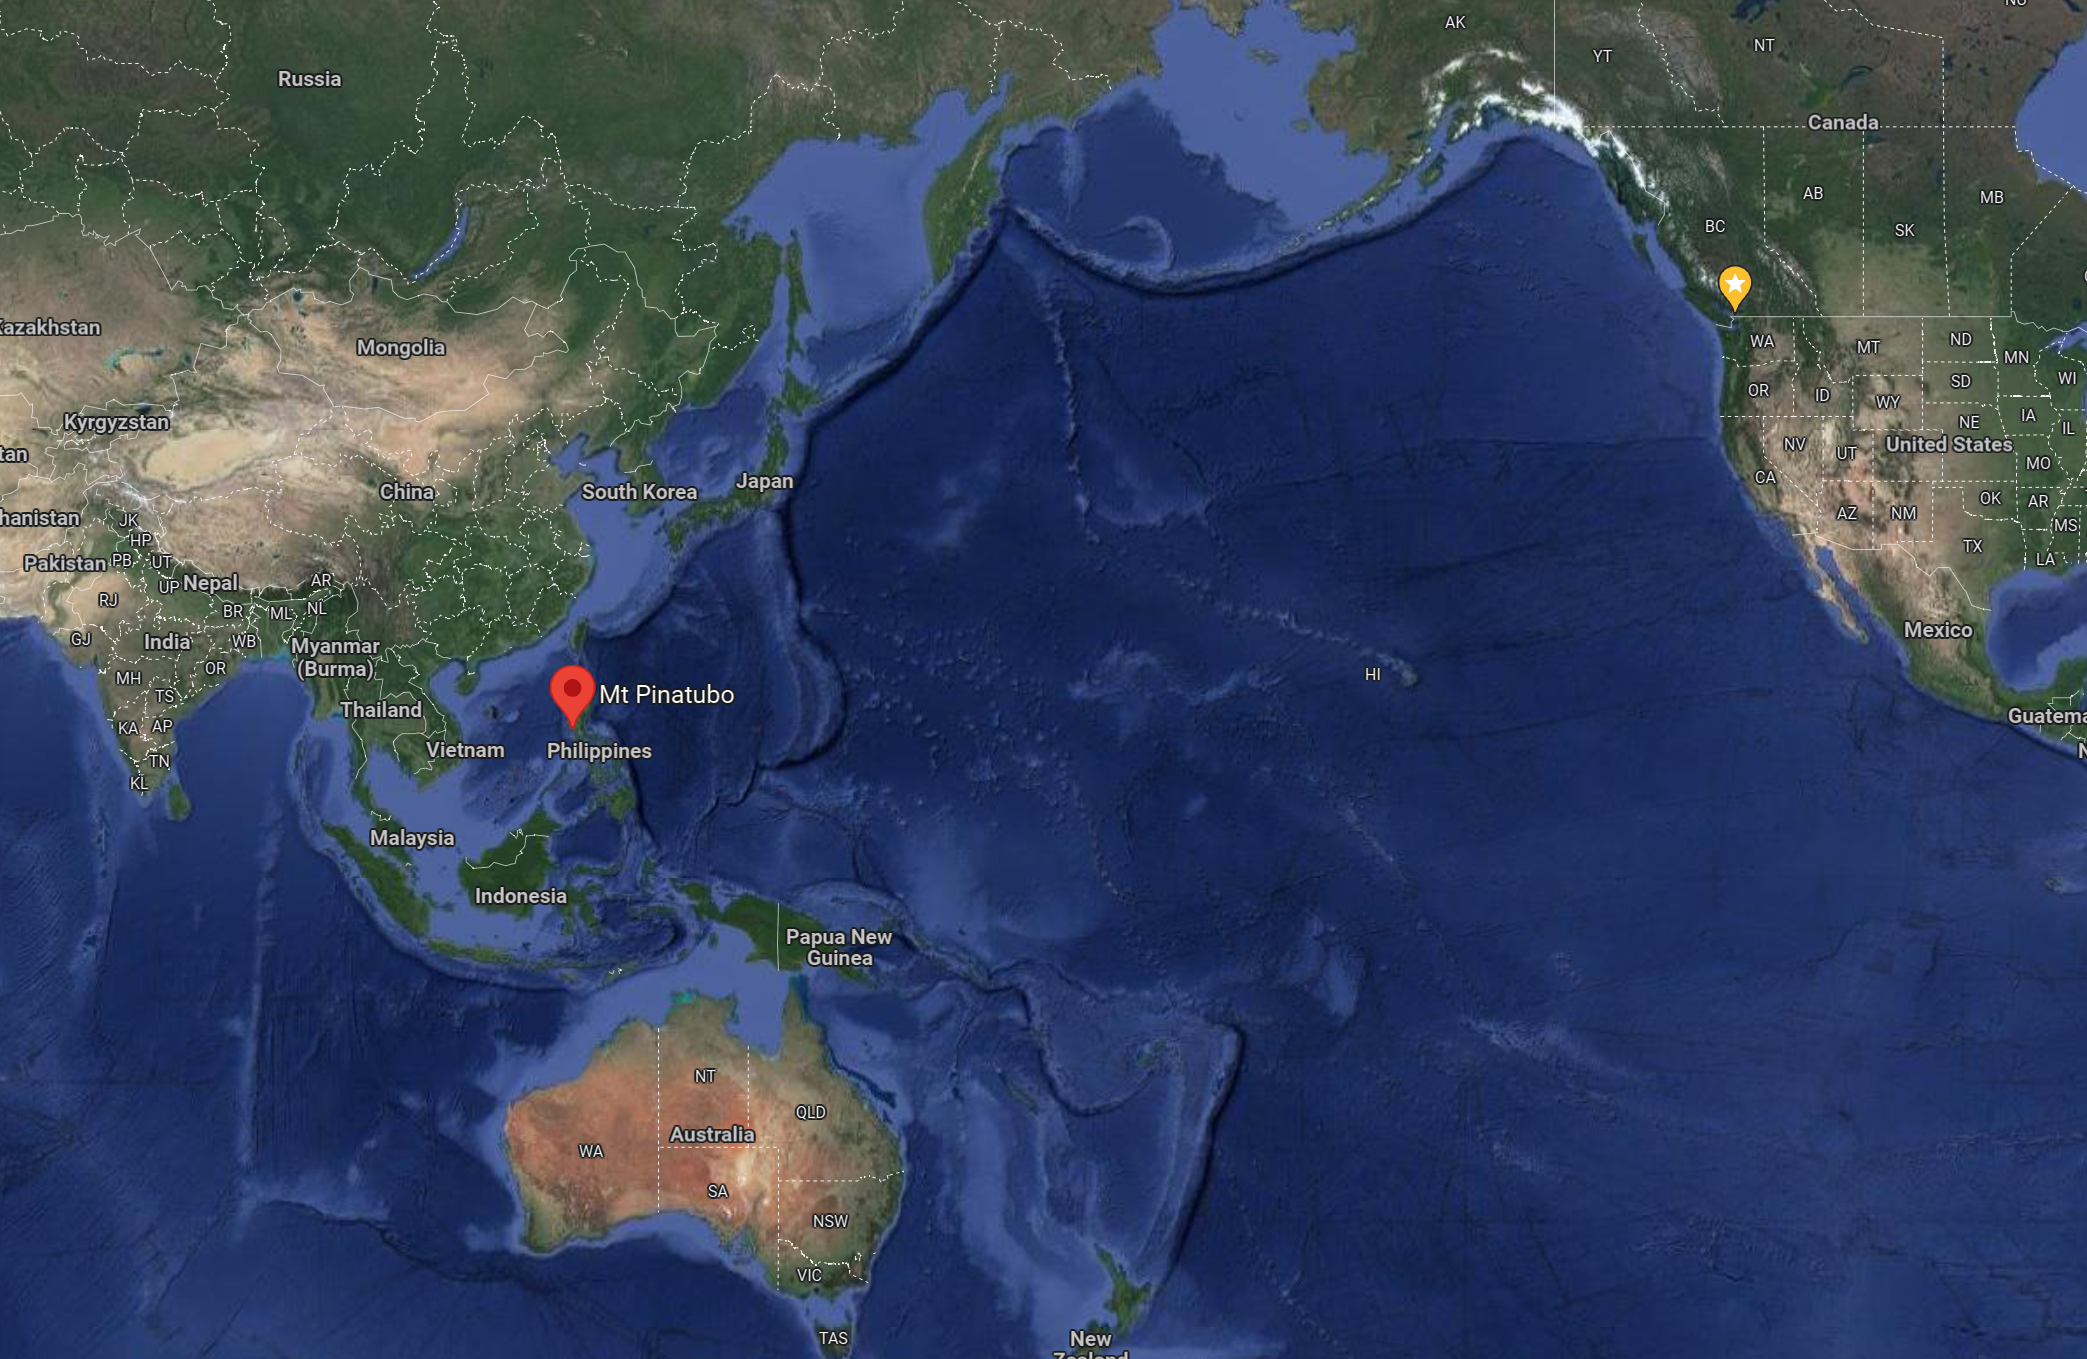

<a id='fig1'>**Figure 2:**</a> **Mount Pinatubo, located near the equator in the northern hemisphere. (Google earth, 2023)**

<br/>

The data was accessed via the [ESGF](#https://esgf-node.llnl.gov/search/cmip6/) and stored as netCDF files readily opened by xarray [[6]](#ref6). The following code loads the CanESM5 model allowing a way to analyse the data for the observed Mount Pinatubo eruption. The data can also be used to tune the volcanic event Climlab 2D model introduced in this study.

In order to run the following code and all subsequent code, run the cell in [appendix A](#app1) to load all the python modules, plotting and helper functions.


In [10]:
# load the atmospheric temperature data of the CanESM5 Pinatobu model
t_atm = xr.open_dataset(r".\data\ta_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

# load the aerosol data of the CanESM5 Pinatobu model
aero = xr.open_dataset(r".\data\od550csaer_AERmon_CanESM5_dcppC-forecast-addPinatubo_s2014-r9i1p2f1_gn_201501-202412.nc")

# load surface temperature data
t_surface = xr.open_dataset(r".\data\ts_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

# load Outgoing long wave radiation and incoming solar radiation
olr = xr.open_dataset(r".\data\rlut_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")
asr = xr.open_dataset(r".\data\rsdt_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")


Now that the data is loaded, variables can be created for each of our parameters:

1. Temperature of atmosphere.
2. Aerosol data.
3. Surface temperature.
4. OLR.
5. ASR.

To start, the mean dataset for each of the above parameters are plotted to verify their distribution. Running the following code extracts the mean data over the span of 5 years for the parameters so we can plot.

In [11]:
# create data variables
coslat = np.cos(np.deg2rad(t_atm.lat))
weight_factor = 1  #coslat / coslat.median(dim='lat') 

aerosol_data = (aero.od550csaer * weight_factor).mean(dim=('time', 'lon'))

temperature_field = (t_atm.ta * weight_factor).mean(dim=('time', 'lon'))

surface_temp = (t_surface.ts * weight_factor).mean(dim=('time', 'lon'))

olr_data = olr.rlut.mean(dim=('time', 'lon'))
asr_data = asr.rsdt.mean(dim=('time', 'lon'))


The data can then be visuallized user our helper function `plot_pinatobu`.

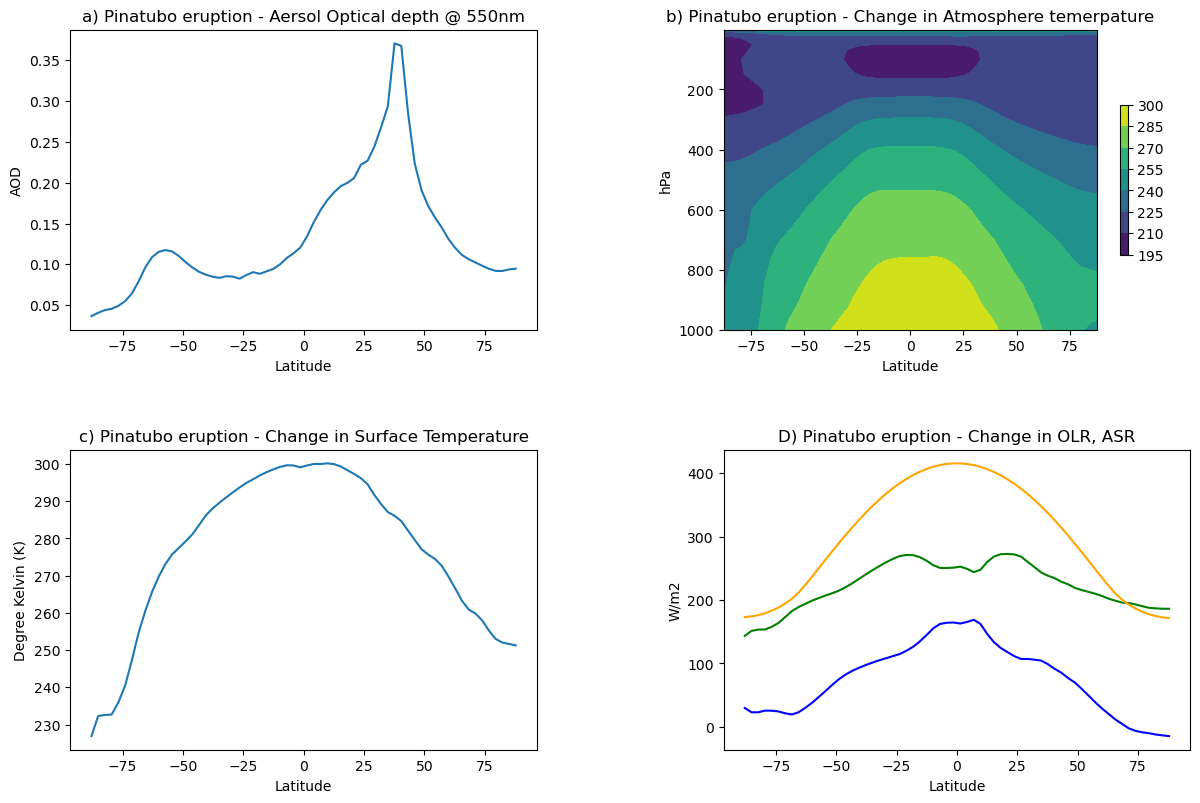

In [12]:
# plot the data
plot_pinatobu(aerosol_data, temperature_field, surface_temp, olr_data, asr_data)

<a id='fig2'>**Figure 3:**</a> **CanESM5 Mount Pinatubo model mean of 5 years of data. a) Aerosol optical depth with latitude. b) The temperature of the atmosphere with latitude. c) Surface temperature with latitude. d) OLR and ASR and the net balance with latitude.**


### 3.1 Volcanic effects on global surface and atmosphere temperatures CanESM5

Before building the model, let's take a look at the effects of the eruption on the global climate found with the CanESM5 model. Plotting the first year of data will show the immediate effects of the eruption.

In [109]:
# temperatures before eruption
temperature_field_before = t_atm.sel(time=slice('1991-06-01', '1992-01-01')).ta.mean(dim=('time', 'lon'))
surface_temp_before = t_surface.sel(time=slice('1991-06-01', '1992-01-01')).ts.mean(dim=('time', 'lon'))
olr_data_before = olr.sel(time=slice('1991-06-01', '1992-01-01')).rlut.mean(dim=('time', 'lon'))
asr_data_before = asr.sel(time=slice('1991-06-01', '1992-01-01')).rsdt.mean(dim=('time', 'lon'))

# temperatures after eruption
surface_temp_after = t_surface.sel(time=slice('1992-01-01', '1993-04-01')).ts.mean(dim=('time', 'lon'))
temperature_field_after = t_atm.sel(time=slice('1992-01-01', '1993-04-01')).ta.mean(dim=('time', 'lon'))
olr_data_after = olr.sel(time=slice('1992-01-01', '1993-04-01')).rlut.mean(dim=('time', 'lon'))
asr_data_after = asr.sel(time=slice('1992-01-01', '1993-04-01')).rsdt.mean(dim=('time', 'lon'))

Now that the data is retrieved, we can plot the difference from the data before the eruption to the year after we see that the we get warmer the southern hemisphere but cooler in the north ([figure 4c](#fig3)). The comparison involves the difference between the year of the eruption to subsequent years assuming that it takes approximately a year for the effects of the event to have on the global climate. 

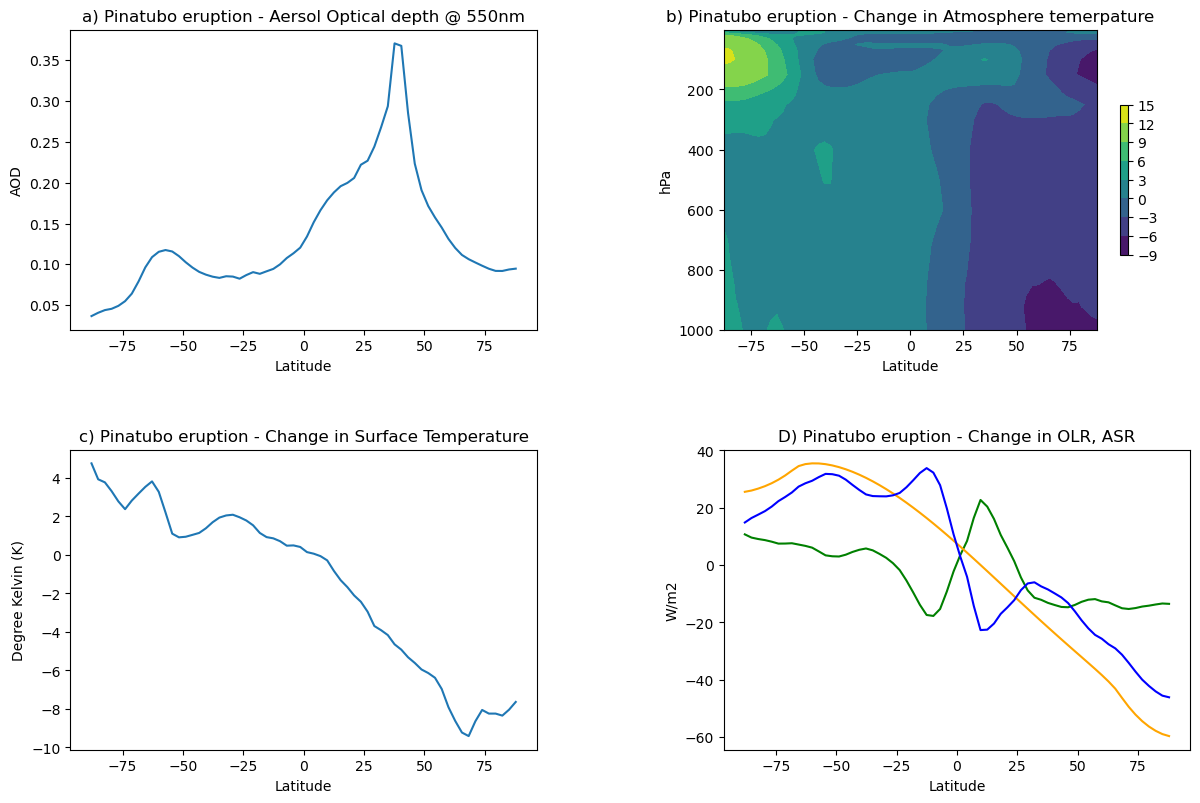

In [161]:
# plot the data
plot_pinatobu(aerosol_data,
              -(temperature_field_before-temperature_field_after), 
              -(surface_temp_before - surface_temp_after), 
              -(olr_data_before - olr_data_after), 
              -(asr_data_before - asr_data_after))

<a id='fig3'>**Figure 4**</a>**: Difference plot from 1991 (year of eruption) and 1992 year. a) Aerosol optical depth with latitude. b) The temperature of the atmosphere with latitude. c) Surface temperature with latitude. d) OLR and ASR and the net balance with latitude.**

</br>

Given that it takes time for the aerosols to circulate the globe and that they also cycle out over the years, the interesting data would be the mean of the years preceding 1992 and consider the year 1995-1996. We can extract this data in the following code: 


In [107]:
# temperatures after eruption
surface_temp_4after = t_surface.sel(time=slice('1995-01-01', '1996-01-01')).ts.mean(dim=('time', 'lon'))
temperature_field_4after = t_atm.sel(time=slice('1995-01-01', '1996-01-01')).ta.mean(dim=('time', 'lon'))
olr_data_4after = olr.sel(time=slice('1995-01-01', '1996-01-01')).rlut.mean(dim=('time', 'lon'))
asr_data_4after = asr.sel(time=slice('1995-01-01', '1996-01-01')).rsdt.mean(dim=('time', 'lon'))

Now to plot the data from 5 years after the eruption with the following code:

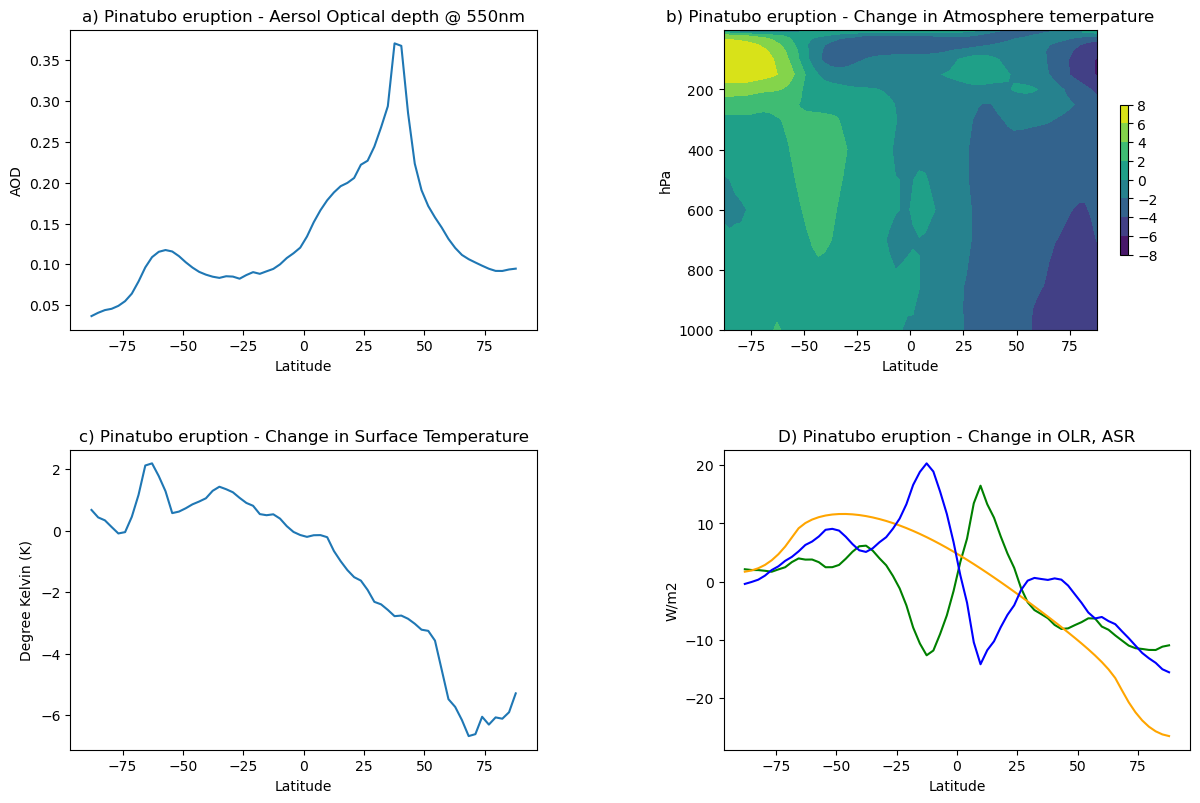

In [162]:
# plot the data
plot_pinatobu(aerosol_data,
              -(temperature_field_before-temperature_field_4after),
              -(surface_temp_before - surface_temp_4after),
              -(olr_data_before - olr_data_4after),
              -(asr_data_before - asr_data_4after))

<a id='fig4'>**Figure 4**</a>**: Difference plot from 1991 (year of eruption) and the 1995 year. a) Aerosol optical depth with latitude. b) The temperature of the atmosphere with latitude. c) Surface temperature with latitude. d) OLR and ASR and the net balance with latitude.**

</br>

It is interesting in that [figure 3](#fig4) shows that the early after the eruption the climate's surface temperature decreased in the northern hemisphere by ~9 K compared to the year of the eruption. While cooling in the north, the southern hemisphere is where a warming occurred. It was expected that a large eruption would cause a global cooling where the CanESM5 model showed that it was a mean cooling with warming in the south. [Figure 4](#fig5) goes on to show that after 5 years the effects are still visible but the warming in the southern atmosphere has merely corrected course to around net zero. Again, the cooling in the north has reduced but is still considerable. The next step will be to explore this with the model used to simulate eruption scenarios.


# 4. EBM Model

To best simulate the effects of a volcanic eruption, A 2D Energy Balance Model (EBM) based of The Climate Laboratory Lab 29 notebook [[13]](#ref13). It is constructed in the following configurations:

2D column data
- 60 layer atmosphere
- 50 cell latitude

The model consists of the processes:
- Radiation
- Insolation
- Water Vapour
- Convection
- Diffusion
- Sensible heat flux
- Latent heat flux

From this base model, aerosols were added to the radiation process via the available parameters `tauaer_sw`, `ssaaer_sw`. These represent the aerosol optical depth and aerosol scattering albedo respectively. 


### 4.1 Define 2D domain and top level model

To initiate the EBM model, first the domain is to be constructed. In the following code discretize the domain into an atmosphere of 50 cells and by a latitude of 60 cells

In [16]:
# A two-dimensional domain
num_lev = 50
state = climlab.column_state(num_lev=num_lev, num_lat=60, water_depth=10.)
levels = state.Tatm.domain.axes['lev'].points
print(f"atmospheric levels:\n\n {levels}")


atmospheric levels:

 [ 10.  30.  50.  70.  90. 110. 130. 150. 170. 190. 210. 230. 250. 270.
 290. 310. 330. 350. 370. 390. 410. 430. 450. 470. 490. 510. 530. 550.
 570. 590. 610. 630. 650. 670. 690. 710. 730. 750. 770. 790. 810. 830.
 850. 870. 890. 910. 930. 950. 970. 990.]


The levels of the atmosphere are outputted for reference and are in units of **hPa**. Meaning, the lower values are top of the atmosphere and higher are near earth's surface.

Next, the base model is initiated with the following.

In [27]:
#  The top-level model
model_base = climlab.TimeDependentProcess(state=state, name='Radiative-Convective-Diffusive Model')

### 4.2 Clouds and Aerosols

To make the simulation closer to reality, the model incorporates clouds at a few levels of the atmosphere.

In [28]:
cloud_parameters = create_cloud_parameters(state)

To simulate the effects of volcanoes and the impact we use the aerosols to simulate an eruption event

In [29]:
aerosol_optical_depth, aerosol_scatter_albedo = build_aerosol_similar(state)

The aerosol profile is viewed in the following figure 6. It was designed to replicate the CanESM5 aerosol optical depth data as oddly the Climlab model crashed with the smooth parametrization.

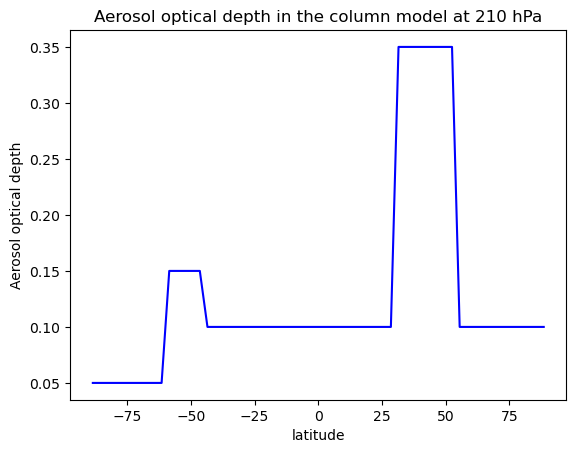

In [102]:
plot_aerosol(aerosol_optical_depth, model_base)

<a id='fig6'>**Figure 6**</a>**: Cloud fraction at two different levels of the atmosphere. High clouds and low clouds.**

</br>

### 4.3 Build the base level model

The domain is defined and the atmospheric parameters are set to now define our model using the Climlab codes. The model consists of several subprocesses in order to simulate the climate and the volcanic event. In the following code, the subprocesses are created and merged into a single model. 

In [55]:
#  Specified relative humidity distribution
h2o = climlab.radiation.ManabeWaterVapor(state=state)

#  Hard convective adjustment for ATMOSPHERE ONLY (not surface)
conv = climlab.convection.ConvectiveAdjustment(state={'Tatm':model_base.state['Tatm']},
                                               adj_lapse_rate=6.5,
                                               **model_base.param)
#  Annual mean insolation as a function of latitude and time of year
sun = climlab.radiation.DailyInsolation(domains=model_base.Ts.domain)

rad = climlab.radiation.RRTMG(name='Radiation',
                              state=state, 
                              specific_humidity=h2o.q,
                              timestep = climlab.constants.seconds_per_day,
                              albedo = 0.125,
                              insolation=sun.insolation,
                              coszen=sun.coszen,
                              tauaer_sw=aerosol_optical_depth,
                              ssaaer_sw=aerosol_scatter_albedo,
                              ecaer_sw=aerosol_optical_depth,
                              **cloud_parameters
                             )
rad.subprocess['SW'].iaer=0,

model_base.add_subprocess('Radiation + Aerosol', rad)
model_base.add_subprocess('Insolation', sun)
model_base.add_subprocess('WaterVapor', h2o)
model_base.add_subprocess('Convection', conv)

from climlab.dynamics import MeridionalDiffusion

# thermal diffusivity in W/m**2/degC
D = 0.04

# meridional diffusivity in m**2/s
K = D / model_base.Tatm.domain.heat_capacity[0] * const.a**2
d = MeridionalDiffusion(state={'Tatm': model_base.state['Tatm']}, 
                        K=K, **model_base.param)
model_base.add_subprocess('Diffusion', d)

#  Add surface heat fluxes
shf = climlab.surface.SensibleHeatFlux(state=model_base.state, Cd=0.5E-3)
lhf = climlab.surface.LatentHeatFlux(state=model_base.state, Cd=0.5E-3)
# set the water vapor input field for LHF

lhf.q = h2o.q
model_base.add_subprocess('SHF', shf)
model_base.add_subprocess('LHF', lhf)


C:\Users\johnk\AppData\Local\miniconda3\envs\climphys\lib\site-packages\climlab\radiation\radiation.py:156: UserWarning: Some grid points are beyond the bounds of the ozone file. Ozone values will be extrapolated.
  warnings.warn('Some grid points are beyond the bounds of the ozone file. Ozone values will be extrapolated.')


</br>

With the model constructed the simulation can begin. First the model will run for 3 years with the set parameters. This will then be the base level at which the climate sensitivity of the Climlab model is measured. The following code instructs the model to run for 3 years.


In [56]:
model_base.integrate_years(3.)

Integrating for 1095 steps, 1095.7266 days, or 3.0 years.
Total elapsed time is 5.996021270269426 years.


</br>
The three year simulation data is extracted and visualised in the following:
</br>

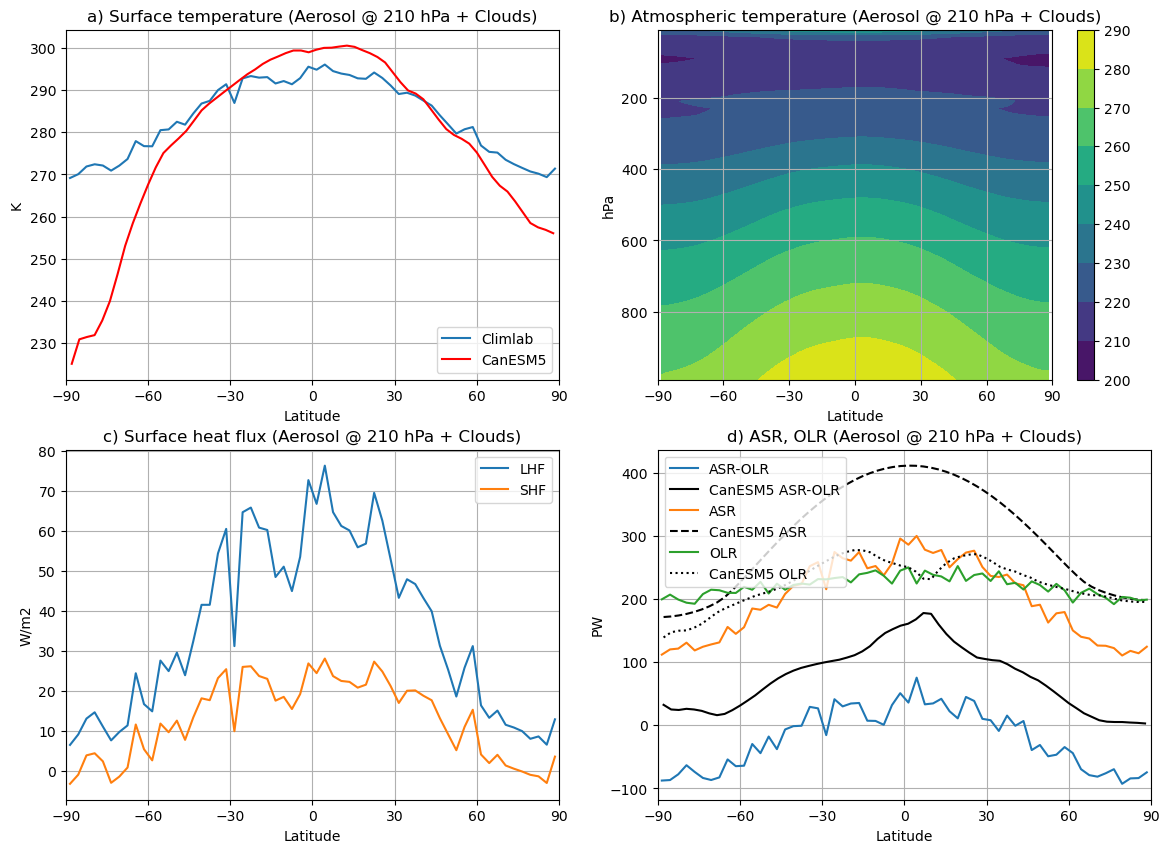

In [119]:
plot_results_comparison(model_base, temperature_field_before, surface_temp_before, olr_data_before, asr_data_before)

<a id='fig7'>**Figure 7**</a>**: Comparison of CanESM5 and Climlab initial results. a) Surface temperatures for CanESM5 and Climlab, b) Atmosphere temperatures for Climlab, c) Heat fluxes, d) ASR and OLR for CanESM5 and Climlab.** 

The initial results are excitingly in the same magnitude. Close enough given the 2D assumption of the model. The equatorial temperatures are close but the Climlab model simulates higher temperatures near the poles. The south pole being the most significant as seen in [figure 7](#fig7).

The largest differences are in the incoming short wavelength radiation and the outgoing longwave radiation. The CanESM5 model predicts much larger ASR values than the Climlab model.

### 4.4 Simulating the Volcanic eruption

It is assumed that material injected into the stratosphere remains longer and has more effect than injection into the tropopause. Assuming this, single large eruptions are the required simulation to measure the impact on climate. Using the current model an eruption of aerosols are injected to the stratosphere (810 kPa) by setting the parameterization in the radiation subprocess and instructing the model to use aerosols in the simulation. This parameterization assumes the material from the eruption distributes itself instantaneously. The following code copies the base model and incorporates aerosols into a new simulation based of the base model.


In [83]:
model_volcano = climlab.process_like(model_base)

model_volcano.subprocess['Radiation + Aerosol'].subprocess['SW'].iaer=10
model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth
model_volcano.subprocess['Radiation + Aerosol'].subprocess['SW'].ssaaer_sw=aerosol_scatter_albedo
model_volcano.integrate_years(1.)

The resulting model parameters are visualised using the helper functions in the appendices to verify the model is producing results within reason.

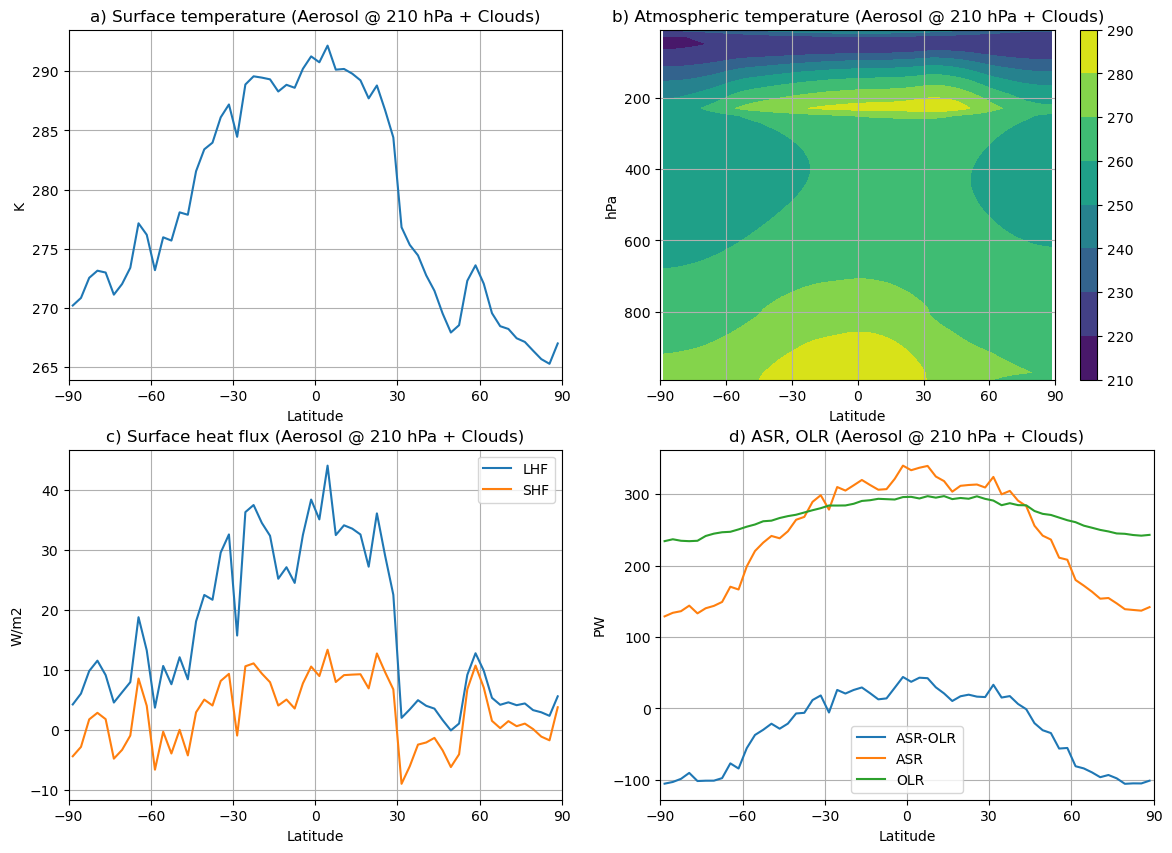

In [112]:
plot_results(model_volcano, [0, 300])


<a id='fig9'>**Figure 8**</a>**: Climlab model run for one year after the aerosol injection. a) Surface temperatures, b) Atmosphere temperatures, c) Heat fluxes, d) ASR and OLR**  

Using this one year result, the change in climate temperatures, heat fluxes and radiation from before eruption can give an idea of the climate sensitivity. Furthermore, a comparison of the first year change with the Pinatubo CanESM5 model extracted previously can be visualised. These results are shown in [figure 9](#fig9) using the proceeding code.

(64,) (64,)


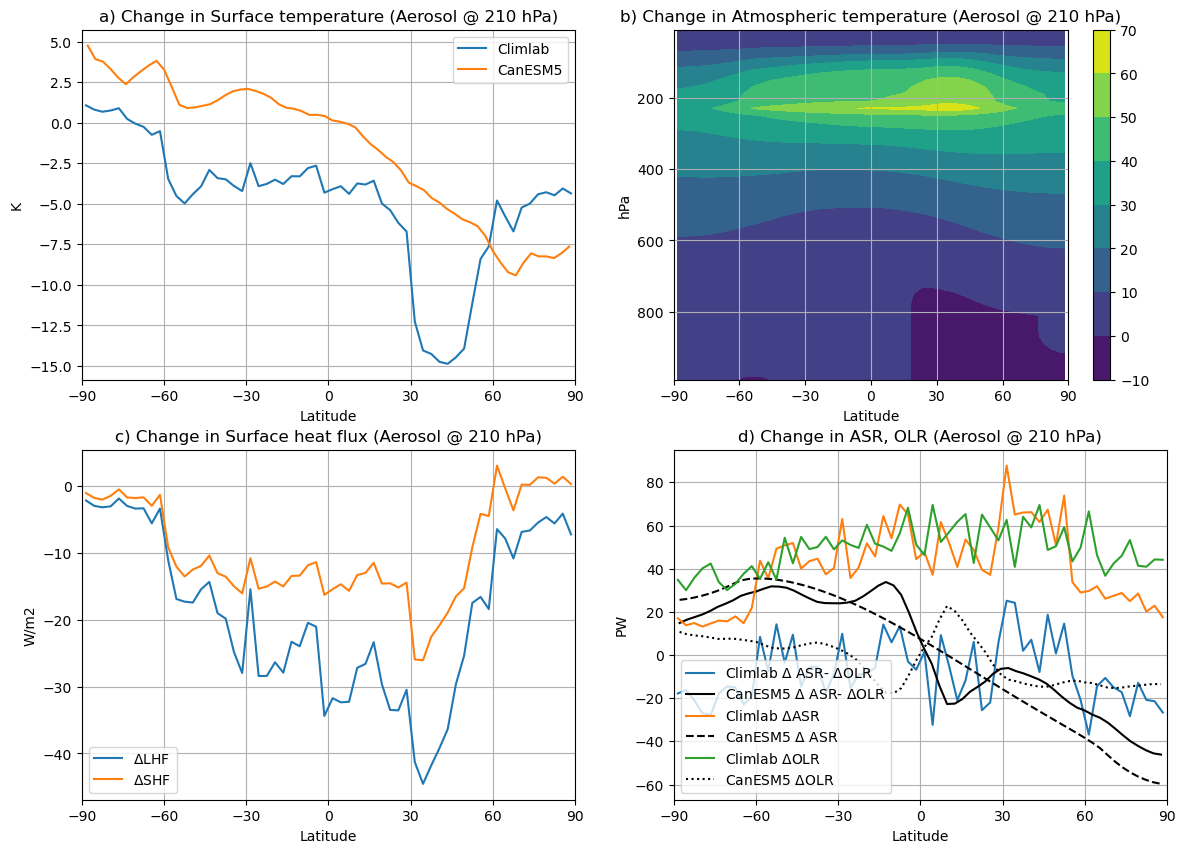

In [151]:
canesm5_surface_temp = -(surface_temp_before - surface_temp_after)
canesm5_olr = -(olr_data_before - olr_data_after)
canesm5_asr = -(asr_data_before - asr_data_after)

plot_climlab_compare(
    model_base,
    model_volcano,
    canesm5_surface_temp,
    canesm5_olr,
    canesm5_asr,
    t_atm.lat
)

<a id='fig9'>**Figure 9**</a>**: Climlab model run for one year. a) Surface temperatures change for CanESM5 and Climlab, b) Atmosphere temperature of Climlab model, c) Heat fluxes of Climlab model, d) Changes in ASR, OLR, ASR-OLR for CanESM5 and Climlab.**

Interestingly, [figure 9](#fig9) illustrates that the Climlab and CanESM5 model show a similar trend for surface temperatures. Both indicate a cooling in the northern hemisphere with less in the southern. The Climlab model has more pronounced decreases in temperature that are likely the parameterization differences between the models. The CanESM5 model interestingly shows a warning after one year in the southern hemisphere. 

From here, four more years will be simulated but each year AOD values will be reduced to simulate the scrubbing of aerosols from the atmosphere.


(64,) (64,)


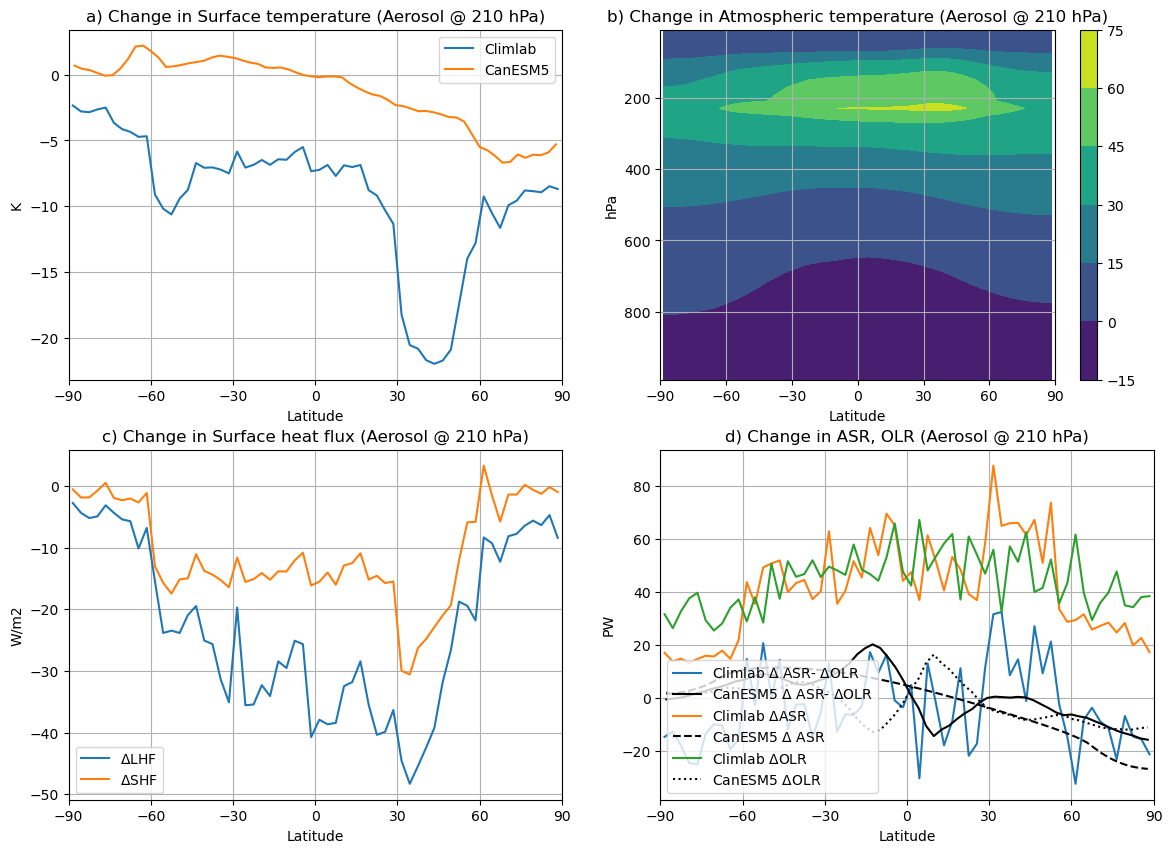

In [150]:
# copy the model from previous run and start a new
model_volcano_cont = climlab.process_like(model_volcano)


for ii in range(4):
        
    model_volcano_cont.subprocess['Radiation + Aerosol'].tauaer_sw *= 0.5

    model_volcano_cont.integrate_years(1.)

canesm5_surface_temp = -(surface_temp_before - surface_temp_4after)
canesm5_olr = -(olr_data_before - olr_data_4after) 
canesm5_asr = -(asr_data_before - asr_data_4after)

plot_climlab_compare(
    model_base,
    model_volcano_cont,
    canesm5_surface_temp,
    canesm5_olr,
    canesm5_asr,
    t_atm.lat,
)

<a id='fig10'>**Figure 10**</a>**: Climlab model run for 5 years. a) Surface temperatures change for CanESM5 and Climlab, b) Atmosphere temperature of Climlab model, c) Heat fluxes of Climlab model, d) Changes in ASR, OLR, ASR-OLR for CanESM5 and Climlab.**

Again, a cooling trend in the northern hemisphere is observed in both models. Climlab being the most. It is actually showing it is getting cooler([figure 10](#fig10)). The two simulations are different in setup which would explain the difference. In the CanESM5 model it is unlikely it is scrubbing aerosols out at the rate at which the Climlab model does. The atmosphere temperature on the other hand looks to be distributing further south than just the pronounced north seen in [figure 9](#fig9)


### 4.5 Remove Aerosols

To see how the climate responds to further time without an eruption the model will remove aerosols and run to equilibrium. In the following code, the aerosols are removed and the climate allowed to return to the base level.

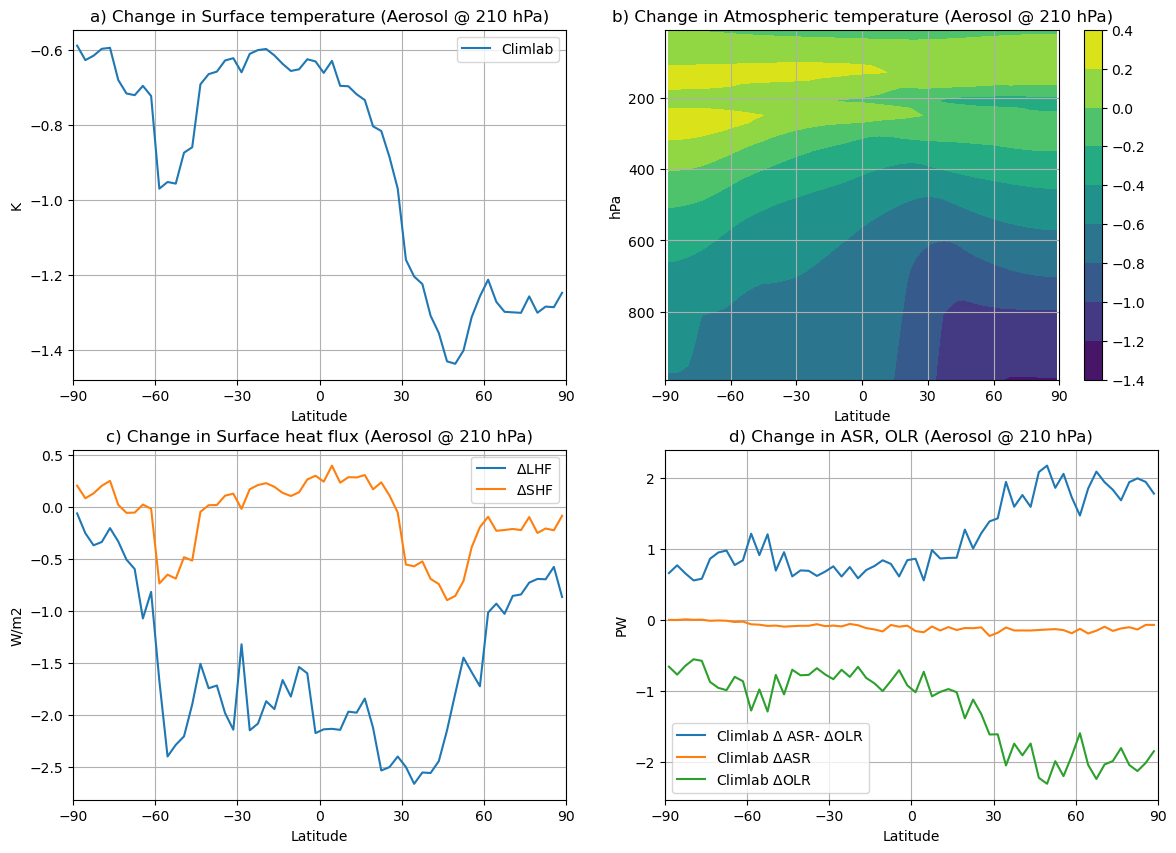

In [155]:
# copy the previous model and continue with that climate but remove the aerosols.
model_remove = climlab.process_like(model_volcano)
model_remove.subprocess['Radiation + Aerosol'].subprocess['SW'].iaer=0
model_remove.subprocess['Radiation + Aerosol'].tauaer_sw = np.zeros_like(aerosol_optical_depth)
model_remove.integrate_years(4.)

plot_climlab_compare(
    model_base,
    model_remove,
    canesm5_surface_temp,
    canesm5_olr,
    canesm5_asr,
    t_atm.lat,
    plot_can=False
)

<a id='fig11'>**Figure 11**</a>:**Climlab model run for four years with aerosols removed. a) Change in surface temperatures, b) Change in atmosphere temperatures, c) change in heat fluxes, d) change in ASR and OLR**  

</br>
Since there is still a remnant of the aerosols effects after 8 years of running our model, running for another 15 years should show the effects completely reversed. The following code will now take the previous aerosol removed model and run it for the additional 15 years.

Integrating for 5478 steps, 5478.633000000001 days, or 15 years.
Total elapsed time is 25.990972565601673 years.


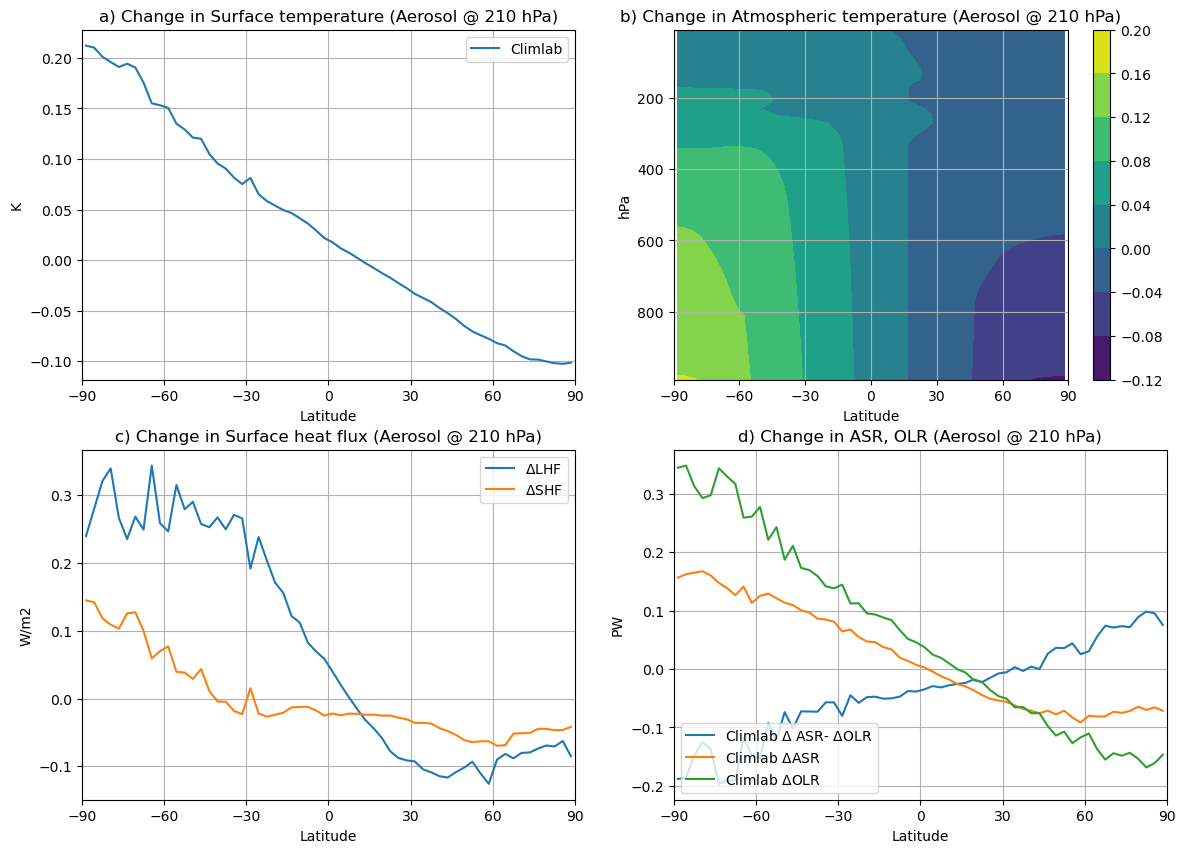

In [163]:
# copy previous model and continue
model_eq = climlab.process_like(model_remove)
model_eq.integrate_years(15)

plot_climlab_compare(
    model_base,
    model_eq,
    canesm5_surface_temp,
    canesm5_olr,
    canesm5_asr,
    t_atm.lat,
    plot_can=False
)

<a id='fig12'>**Figure 12**</a>**: Climlab model difference of Climlab model prior to eruption to 15 years after the 4 years with aerosols removed. a) Change in surface temperatures, b) Change in atmosphere temperatures, c) change in heat fluxes, d) change in ASR and OLR**

The model is now considerably similar to the base line. The difference in surface temperatures are minimal and the distribution is relatively similar. The climate can be considered recovered.


## 5. Discussion

In the preceding sections simulations of single event volcano eruption produce snap shots of the climate at various times after an event. To measure the validity of the model, a comparison to the same temperature parameters of the VolMIP CMIP6 CanESM5 model are compared. Though the models are not exactly the same, the general response of the climate is appropriately similar. Both models show a significant response in the northern hemisphere where the highest values of AOD are found. Both models also indicate a less impact on the climate in the southern hemisphere compared to the northern hemisphere. This is observed one year and five years after the eruption. The paper **Ice-Core Evidence of Abrupt Climate Changes**, using ice records right after the cooling event followed periods of warming [[13]](#ref13). Deducing from the simulations, this represents the recovery of the climate as aerosols are removed from the atmosphere.

After an eruption has occurred, the life cycle of the aerosols in the stratosphere is important. The models indicate that the longer the aerosols are in the atmosphere the longer the cooling effect on the climate. Once removed completely from the model, the Climlab model indicates it can take 8+ years for the climate to recover to the baseline.

Given the requirement to have longer lasting effects on the global climate, single volcanic eruptions are the prime candidates. At the rate at which anthropogenic sources warm the planet, only cluster large eruption events could have the requirements to cool the warming.


## 6. Conclusion

It was expected that the volcanic events would produce cooling of the climate as $SO_4$ is more abundant than that of $CO_2$ which is negligible compared to the amount anthropogenic sources add yearly. Both the Climlab and CanESM5 models confirm the assumption that cooling is caused by the aerosols emitted by volcanoes into the atmosphere. The effects take rather quickly. Judging from the Climlab model and the CanESM5 model it is entirely possible that a Volcano can cool the planet effectively, even enough so to counteract the warming currently experienced. Though, to accomplish this, cluster events of large eruptions injecting into the stratosphere would be required. The continual injection countering the warming by anthropogenic sources. Earth is a volcanically active planet, but not extreme enough in its current state to support this activity.


## 7. Reflection

Not coming from a background in climate science, but since I was familiar with a lot of the underlying maths and physics, I still got to thoroughly enjoy the class. A particular aspect of the course that was standout was the use of jupyter notebooks and accelerated python packages such as xarray. I use these extensively in industry and in research. They are the current way science is being facilitated. With the detailed instruction of the lab notebook and assignments I was able to formulate hypotheses and methods for how to apply numerical modelling techniques to climate problems. It is much different than the geophysical problems I am accustomed to allowing me to expand my experience. The type of way to parameterize processes was also particularly interesting. I certainly benefit from learning different perspectives. A challenge I had was the time required to search for data when you don't have immediate access to it or knowledge of where to start looking. I fortunately work in a research area where data is abundant with and exhaustive list. This is not so much the case for volcanic events. It was an eye opener but a well accepted challenge. 

If I were to do another climate project I would set aside time to learn and set up running full 3D CESM models. With this I would focus on the time for material of an eruption to distribute globally. Using this, an idea of how quickly, say on monthly scales, the global climate responds.  

With the enjoyment, new skills and perspectives I would give myself an A for the project. Being able to search for sparse data, extract, interpret, manipulate and model volcanoes all with open source software is very exciting. The model itself built from knowledge and instruction from class material reflects closely to models produced and observation by other groups is a cool feat in itself. All this together feels like an **A** graded job.

# References:

1. <a id='ref1'>Paik, Seungmok, and Seung-Ki Min. ‘Assessing the Impact of Volcanic Eruptions on Climate Extremes Using CMIP5 Models’. Journal of Climate 31, no. 14 (15 July 2018): 5333–49. https://doi.org/10.1175/JCLI-D-17-0651.1.</a>


2. <a id='ref2'>Alston, Erica, and Irina Sokolik. ‘Assessment of Aerosol Radiative Forcing with 1-D Radiative Transfer Modeling in the U. S. South-East’. Atmosphere 9, no. 7 (17 July 2018): 271. https://doi.org/10.3390/atmos9070271.</a>


3. <a id='ref3'>Anchukaitis, Kevin J., Petra Breitenmoser, Keith R. Briffa, Agata Buchwal, Ulf Büntgen, Edward R. Cook, Rosanne D.</a>


4. <a id='ref4'>D’Arrigo, et al. ‘Tree Rings and Volcanic Cooling’. Nature Geoscience 5, no. 12 (December 2012): 836–37. https://doi.org/10.1038/ngeo1645.</a>


5. <a id='ref5'> Dhomse, S. S., K. M. Emmerson, G. W. Mann, N. Bellouin, K. S. Carslaw, M. P. Chipperfield, R. Hommel, et al. ‘Aerosol Microphysics Simulations of the Mt.~Pinatubo Eruption with the UM-UKCA Composition-Climate Model’. Atmospheric Chemistry and Physics 14, no. 20 (24 October 2014): 11221–46. https://doi.org/10.5194/acp-14-11221-2014.</a>


6. <a id='ref6'>Hoyer, S. and Hamman, J., 2017. xarray: N-D labeled arrays and datasets in Python. Journal of Open Research Software, 5(1), p.10. DOI: http://doi.org/10.5334/jors.148</a>


7. <a id='ref7'>Chung, Serena H. ‘Global Distribution and Climate Forcing of Carbonaceous Aerosols’. Journal of Geophysical Research 107, no. D19 (2002): 4407. https://doi.org/10.1029/2001JD001397.</a>


8. <a id='ref8'>VolMIP CMIP. (n.d.). Climate and Earth System Model Evaluation Project. Retrieved March 05, 2023, from https://www-volmip.ipsl.fr/</a>


9. <a id='ref9'>ClimLan. (2021). GitHub repository. Retrieved January 09, 2023, from https://github.com/climlan/climlan</a>


10. <a id='ref10'>Robock, Alan, and Jianping Mao. ‘The Volcanic Signal in Surface Temperature Observations’. Journal of Climate 8, no. 5 (May 1995): 1086–1103. https://doi.org/10.1175/1520-0442</a>


11. <a id='ref11'>Tabazadeh, A., and R. P. Turco. “Stratospheric Chlorine Injection by Volcanic Eruptions: HCl Scavenging and Implications for Ozone.” Science 260, no. 5111 (1993): 1082–86. http://www.jstor.org/stable/2881602.</a>


12. <a id='ref12'>Carslaw, Kenneth & Boucher, Olivier & Spracklen, Dominick & Mann, Graham & Rae, Jamie & Woodward, Stephanie & Kulmala, Markku. (2010). A review of natural aerosol interactions and feedbacks within the Earth system. Atmospheric Chemistry and Physics. 10. 10.5194/acp-10-1701-2010. </a>


13. <a id='ref13'>Rose, B. E. J. (2014). The Climate Laboratory: A hands-on approach to climate physics and climate modeling. John Wiley & Sons.</a>


14. <a id='ref14'>Alley, Richard B. ‘Ice-Core Evidence of Abrupt Climate Changes’. Proceedings of the National Academy of Sciences 97, no. 4 (15 February 2000): 1331–34. https://doi.org/10.1073/pnas.97.4.1331.</a>

## <a id="app1">Apendix A</a> - Helper functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab
from climlab import constants as const

def plot_pinatobu(aero_dat, field, ts_dat, olr_dat, asr_dat):
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 9))
    
    # aerosol data
    axs[0, 0].plot(aero_dat.lat, aero_dat)
    axs[0, 0].set_title('a) Pinatubo eruption - Aersol Optical depth @ 550nm', fontsize=12)
    axs[0, 0].set_xlabel('Latitude')
    axs[0, 0].set_ylabel('AOD')
    
    # atmospheric temperature 
    cax = axs[0, 1].contourf(field.lat, field.plev * 1e-2, field)
    axs[0, 1].set_title('b) Pinatubo eruption - Change in Atmosphere temerpature', fontsize=12)
    axs[0, 1].set_xlabel('Latitude')
    axs[0, 1].set_ylabel('hPa')
    axs[0, 1].invert_yaxis()
    fig.colorbar(cax, ax=axs[0, 1], shrink=0.5)
    
    # surface temperature
    axs[1, 0].plot(ts_dat.lat, ts_dat)
    axs[1, 0].set_title('c) Pinatubo eruption - Change in Surface Temperature', fontsize=12)
    axs[1, 0].set_xlabel('Latitude')
    axs[1, 0].set_ylabel('Degree Kelvin (K)')
    
    # OLR ASR
    axs[1, 1].plot(olr_dat.lat, olr_dat, 'g')
    axs[1, 1].plot(asr_dat.lat, asr_dat, 'orange')
    axs[1, 1].plot(asr_dat.lat, asr_dat - olr_dat, 'b')
    axs[1, 1].set_title('D) Pinatubo eruption - Change in OLR, ASR', fontsize=12)
    axs[1, 1].set_xlabel('Latitude')
    axs[1, 1].set_ylabel('W/m2')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    

def plot_results_comparison(model, temperature_field_before, surface_temp_before, olr_data_before, asr_data_before):
    
    ticks = [-90, -60, -30, 0, 30, 60, 90]
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    ax = axes[0,0]
    ax.plot(model.lat, model.timeave['Ts'], label='Climlab')
    ax.plot(surface_temp_before.lat, surface_temp_before, 'r', label='CanESM5')
    # ax.set_title('Surface temperature (Aerosol + Clouds)')
    # ax.set_title('Surface temperature (Aerosol @ 810 hPa + Clouds)')
    ax.set_title('a) Surface temperature (Aerosol @ 210 hPa)')
    # ax.set_title('Surface temperature (Aerosol + Clear sky)')
    ax.set_ylabel('K')
    ax.legend(loc='lower right')

    ax2 = axes[0,1]
    field = (model.timeave['Tatm']).transpose()
    cax = ax2.contourf(model.lat, model.lev, field)
    ax2.invert_yaxis()
    fig.colorbar(cax, ax=ax2)
    # ax2.set_title('Atmospheric temperature (Aerosol + Clear sky)');
    # ax2.set_title('Atmospheric temperature (Aerosol + Clouds)')
    # ax2.set_title('Atmospheric temperature (Aerosol @ 810 hPa + Clouds)')
    ax2.set_title('b) Atmospheric temperature (Aerosol @ 210 hPa)')
    ax2.set_ylabel('hPa')

    ax3 = axes[1,0]
    ax3.plot(model.lat, model.timeave['LHF'], label='LHF')
    ax3.plot(model.lat, model.timeave['SHF'], label='SHF')
    # ax3.set_title('Surface heat flux (Aerosol + Clouds)')
    # ax3.set_title('Surface heat flux (Aerosol + clear sky)')
    # ax3.set_title('Surface heat flux (Aerosol @ 810 hPa + Clouds)')
    ax3.set_title('c) Surface heat flux (Aerosol @ 210 hPa)')

    ax3.set_ylabel('W/m2')
    ax3.legend();

    ax4 = axes[1,1]
    Rtoa = np.squeeze(model.timeave['ASR'] - model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    ax4.plot(model.lat, Rtoa, label='ASR-OLR')
    ax4.plot(olr_data_before.lat, asr_data_before - olr_data_before, '-k', label='CanESM5 ASR-OLR')
    ax4.plot(model.lat, model.timeave['ASR'], label='ASR')
    ax4.plot(asr_data_before.lat, asr_data_before, '--k', label='CanESM5 ASR')
    ax4.plot(model.lat, model.timeave['OLR'], label='OLR')
    ax4.plot(olr_data_before.lat, olr_data_before, ':k', label='CanESM5 OLR')
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    # ax4.set_title('ASR, OLR (Aerosol + Clear sky)')
    # ax4.set_title('ASR, OLR (Aerosol @ 810 hPa + Clouds)')
    ax4.set_title('d) ASR, OLR (Aerosol @ 210 hPa)')
    ax4.legend(loc='upper left')
    ax4.set_ylabel('PW')

    for ax in axes.flatten():
        ax.set_xlim(-90,90); ax.set_xticks(ticks)
        ax.set_xlabel('Latitude'); ax.grid();

#     print(f"\n\n equilibrium:           {(model.ASR - model.OLR)[0]}")

def plot_climlab(model, model2):
    
    ticks = [-90, -60, -30, 0, 30, 60, 90]
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    ax = axes[0,0]
    ax.plot(model.lat, model.timeave['Ts'] - model2.timeave['Ts'])
    # ax.set_title('Surface temperature (Aerosol + Clouds)')
    # ax.set_title('Surface temperature (Aerosol @ 810 hPa + Clouds)')
    ax.set_title('Surface temperature (Aerosol @ 210 hPa)')
    # ax.set_title('Surface temperature (Aerosol + Clear sky)')
    ax.set_ylabel('K')

    ax2 = axes[0,1]
    field = (model.timeave['Tatm'] - model2.timeave['Tatm']).transpose()
    cax = ax2.contourf(model.lat, model.lev, field)
    ax2.invert_yaxis()
    fig.colorbar(cax, ax=ax2)
    # ax2.set_title('Atmospheric temperature (Aerosol + Clear sky)');
    # ax2.set_title('Atmospheric temperature (Aerosol + Clouds)')
    # ax2.set_title('Atmospheric temperature (Aerosol @ 810 hPa + Clouds)')
    ax2.set_title('Atmospheric temperature (Aerosol @ 210 hPa)')
    ax2.set_ylabel('hPa')

    ax3 = axes[1,0]
    ax3.plot(model.lat, model.timeave['LHF'] - model2.timeave['LHF'], label='LHF')
    ax3.plot(model.lat, model.timeave['SHF'] - model2.timeave['SHF'], label='SHF')
    # ax3.set_title('Surface heat flux (Aerosol + Clouds)')
    # ax3.set_title('Surface heat flux (Aerosol + clear sky)')
    # ax3.set_title('Surface heat flux (Aerosol @ 810 hPa + Clouds)')
    ax3.set_title('Surface heat flux (Aerosol @ 210 hPa)')

    ax3.set_ylabel('W/m2')
    ax3.legend();

    ax4 = axes[1,1]
    Rtoa = np.squeeze((model.timeave['ASR'] - model2.timeave['ASR']) - (model.timeave['OLR'] - model2.timeave['OLR']))
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    ax4.plot(model.lat, Rtoa)
    ax4.plot(model.lat, model.timeave['ASR'] - model2.timeave['ASR'])
    ax4.plot(model.lat, model.timeave['OLR'] - model2.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    # ax4.set_title('ASR, OLR (Aerosol + Clear sky)')
    # ax4.set_title('ASR, OLR (Aerosol @ 810 hPa + Clouds)')
    ax4.set_title('ASR, OLR (Aerosol @ 210 hPa)')
    ax4.legend(['ASR-OLR', 'ASR', 'OLR'])
    ax4.set_ylabel('PW')

    for ax in axes.flatten():
        ax.set_xlim(-90,90); ax.set_xticks(ticks)
        ax.set_xlabel('Latitude'); ax.grid();

#     print(f"\n\n equilibrium:           {(model.ASR - model.OLR)[0]}")


def plot_climlab_compare(model, model2,
    canesm5_surface_temp,
    canesm5_olr,
    canesm5_asr,
    lat,
    plot_can=True):
    
    ticks = [-90, -60, -30, 0, 30, 60, 90]
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    ax = axes[0,0]
    ax.plot(model.lat, -(model.timeave['Ts'] - model2.timeave['Ts']), label="Climlab")
    
    if plot_can:
        ax.plot(lat, canesm5_surface_temp, label="CanESM5")
    # ax.set_title('Surface temperature (Aerosol + Clouds)')
    # ax.set_title('Surface temperature (Aerosol @ 810 hPa + Clouds)')
    ax.set_title('a) Change in Surface temperature (Aerosol @ 210 hPa)')
    # ax.set_title('Surface temperature (Aerosol + Clear sky)')
    ax.set_ylabel('K')
    ax.legend()

    ax2 = axes[0,1]
    field = -(model.timeave['Tatm'] - model2.timeave['Tatm']).transpose()
    cax = ax2.contourf(model.lat, model.lev, field)
    ax2.invert_yaxis()
    fig.colorbar(cax, ax=ax2)
    # ax2.set_title('Atmospheric temperature (Aerosol + Clear sky)');
    # ax2.set_title('Atmospheric temperature (Aerosol + Clouds)')
    # ax2.set_title('Atmospheric temperature (Aerosol @ 810 hPa + Clouds)')
    ax2.set_title('b) Change in Atmospheric temperature (Aerosol @ 210 hPa)')
    ax2.set_ylabel('hPa')

    ax3 = axes[1,0]
    ax3.plot(model.lat, -(model.timeave['LHF'] - model2.timeave['LHF']), label='$\Delta$LHF')
    ax3.plot(model.lat, -(model.timeave['SHF'] - model2.timeave['SHF']), label='$\Delta$SHF')
    # ax3.set_title('Surface heat flux (Aerosol + Clouds)')
    # ax3.set_title('Surface heat flux (Aerosol + clear sky)')
    # ax3.set_title('Surface heat flux (Aerosol @ 810 hPa + Clouds)')
    ax3.set_title('c) Change in Surface heat flux (Aerosol @ 210 hPa)')

    ax3.set_ylabel('W/m2')
    ax3.legend();

    ax4 = axes[1,1]
    Rtoa = np.squeeze((model.timeave['ASR'] - model2.timeave['ASR']) - (model.timeave['OLR'] - model2.timeave['OLR']))
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    ax4.plot(model.lat, -Rtoa, label='Climlab $\Delta$ ASR- $\Delta$OLR')
    
    ax4.plot(model.lat, -(model.timeave['ASR'] - model2.timeave['ASR']), label="Climlab $\Delta$ASR")
    
    ax4.plot(model.lat, -(model.timeave['OLR'] - model2.timeave['OLR']), label="Climlab $\Delta$OLR")
    
    if plot_can:
        ax4.plot(lat, canesm5_asr - canesm5_olr,'-k',label='CanESM5 $\Delta$ ASR- $\Delta$OLR')
        ax4.plot(lat, canesm5_olr, ':k', label='CanESM5 $\Delta$OLR')
        ax4.plot(lat, canesm5_asr, '--k', label='CanESM5 $\Delta$ ASR')
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    # ax4.set_title('ASR, OLR (Aerosol + Clear sky)')
    # ax4.set_title('ASR, OLR (Aerosol @ 810 hPa + Clouds)')
    ax4.set_title('d) Change in ASR, OLR (Aerosol @ 210 hPa)')
    ax4.legend(loc='lower left')
    ax4.set_ylabel('PW')

    for ax in axes.flatten():
        ax.set_xlim(-90,90); ax.set_xticks(ticks)
        ax.set_xlabel('Latitude'); ax.grid();


def plot_results(model, limits):
    
    ticks = [-90, -60, -30, 0, 30, 60, 90]
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    ax = axes[0,0]
    ax.plot(model.lat, model.timeave['Ts'])
    # ax.set_title('Surface temperature (Aerosol + Clouds)')
    # ax.set_title('Surface temperature (Aerosol @ 810 hPa + Clouds)')
    ax.set_title('a) Surface temperature (Aerosol @ 210 hPa)')
    # ax.set_title('Surface temperature (Aerosol + Clear sky)')
    ax.set_ylabel('K')

    ax2 = axes[0,1]
    field = (model.timeave['Tatm']).transpose()
    cax = ax2.contourf(model.lat, model.lev, field)
    ax2.invert_yaxis()
    fig.colorbar(cax, ax=ax2)
    # ax2.set_title('Atmospheric temperature (Aerosol + Clear sky)');
    # ax2.set_title('Atmospheric temperature (Aerosol + Clouds)')
    # ax2.set_title('Atmospheric temperature (Aerosol @ 810 hPa + Clouds)')
    ax2.set_title('b) Atmospheric temperature (Aerosol @ 210 hPa)')
    ax2.set_ylabel('hPa')

    ax3 = axes[1,0]
    ax3.plot(model.lat, model.timeave['LHF'], label='LHF')
    ax3.plot(model.lat, model.timeave['SHF'], label='SHF')
    # ax3.set_title('Surface heat flux (Aerosol + Clouds)')
    # ax3.set_title('Surface heat flux (Aerosol + clear sky)')
    # ax3.set_title('Surface heat flux (Aerosol @ 810 hPa + Clouds)')
    ax3.set_title('c) Surface heat flux (Aerosol @ 210 hPa)')

    ax3.set_ylabel('W/m2')
    ax3.legend();

    ax4 = axes[1,1]
    Rtoa = np.squeeze(model.timeave['ASR'] - model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    ax4.plot(model.lat, Rtoa)
    ax4.plot(model.lat, model.timeave['ASR'])
    ax4.plot(model.lat, model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    # ax4.set_title('ASR, OLR (Aerosol + Clear sky)')
    # ax4.set_title('ASR, OLR (Aerosol @ 810 hPa + Clouds)')
    ax4.set_title('d) ASR, OLR (Aerosol @ 210 hPa)')
    ax4.legend(['ASR-OLR', 'ASR', 'OLR'])
    ax4.set_ylabel('PW')

    for ax in axes.flatten():
        ax.set_xlim(-90,90); ax.set_xticks(ticks)
        ax.set_xlabel('Latitude'); ax.grid();

#     print(f"\n\n equilibrium:           {(model.ASR - model.OLR)[0]}")
    

def inferred_heat_transport( energy_in, lat_deg ):
    '''Returns the inferred heat transport (in PW) by integrating the net energy imbalance from pole to pole.'''
    from scipy import integrate
    from climlab import constants as const
    lat_rad = np.deg2rad( lat_deg )
    return ( 1E-15 * 2 * np.math.pi * const.a**2 * 
            integrate.cumtrapz( np.cos(lat_rad)*energy_in,
            x=lat_rad, initial=0. ) )


def create_cloud_parameters(state):
    """
    
        based on lab Albany
    
    """

    #  Define two types of cloud, high and low
    cldfrac = np.zeros_like(state.Tatm)
    r_liq = np.zeros_like(state.Tatm)
    r_ice = np.zeros_like(state.Tatm)
    clwp = np.zeros_like(state.Tatm)
    ciwp = np.zeros_like(state.Tatm)

    #   indices
    high = 10  # corresponds to 210 hPa
    low = 40   #  corresponds to 810 hPa

    #  A high, thin ice layer (cirrus cloud)
    r_ice[:,high] = 14. # Cloud ice crystal effective radius (microns)
    ciwp[:,high] = 10.  # in-cloud ice water path (g/m2)
    cldfrac[:,high] = 0.322

    #  A low, thick, water cloud layer (stratus)
    r_liq[:,low] = 14.  # Cloud water drop effective radius (microns)
    clwp[:,low] = 100.  # in-cloud liquid water path (g/m2)
    cldfrac[:,low] = 0.21

    # wrap everything up in a dictionary
    cloud_parameter = {'cldfrac': cldfrac,
                       'ciwp': ciwp,
                       'clwp': clwp,
                       'r_ice': r_ice,
                       'r_liq': r_liq}
    
    return cloud_parameter


def plot_cloud_fraction(cldfrac):
    
    plt.plot(cldfrac[0,:], lev)
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (hPa)')
    plt.xlabel('Cloud fraction')
    plt.title('Prescribed cloud fraction in the column model')
    plt.show()
    
def build_aerosol_similar(state):

    #  Define two types of aerosol injections, high and low
    aerosol_optical_depth = np.zeros_like(state.Tatm)

    #   indices
    high = 10  # corresponds to 210 hPa
    low = 40   #  corresponds to 810 hPa

    # now lets take the observed data from the Pinatobu eruption
    # aero_input = aero_dat.interp(lat=model_base.lat)

    #  A high, aerosol injection
    aerosol_optical_depth[:,high] = 0.1
    aerosol_optical_depth[:,high + 1] = 0.1
    aerosol_optical_depth[40:48,high] = 0.35
    aerosol_optical_depth[40:48,high + 1] = 0.35
    aerosol_optical_depth[10:15,high] = 0.15
    aerosol_optical_depth[10:15,high + 1] = 0.15
    aerosol_optical_depth[:10,high] = 0.05
    aerosol_optical_depth[:10,high + 1] = 0.05

    #  A low, aerosol injection height
    # aerosol_optical_depth[:,low] = 0.35
    # aerosol_optical_depth[:,low + 1] = 0.35

    aerosol_scatter_albedo = np.zeros_like(state.Tatm)

    aerosol_scatter_albedo[:,high] = 0.1
    aerosol_scatter_albedo[:,high + 1] = 0.1
    
    return aerosol_optical_depth, aerosol_scatter_albedo
    

def plot_aerosol(aerosol_optical_depth, model_base):
    
    high = 10  # corresponds to 210 hPa
    low = 40   #  corresponds to 810 hPa

    plt.plot(model_base.lat, aerosol_optical_depth[:,high], 'b')
    # plt.plot(aerosol_optical_depth[20,:], lev, 'g')
    # plt.plot(aerosol_optical_depth[50,:], lev, 'r')
    # plt.gca().invert_yaxis()
    plt.xlabel('latitude')
    plt.ylabel('Aerosol optical depth')
    plt.title('Aerosol optical depth in the column model at 210 hPa')
    plt.show()
